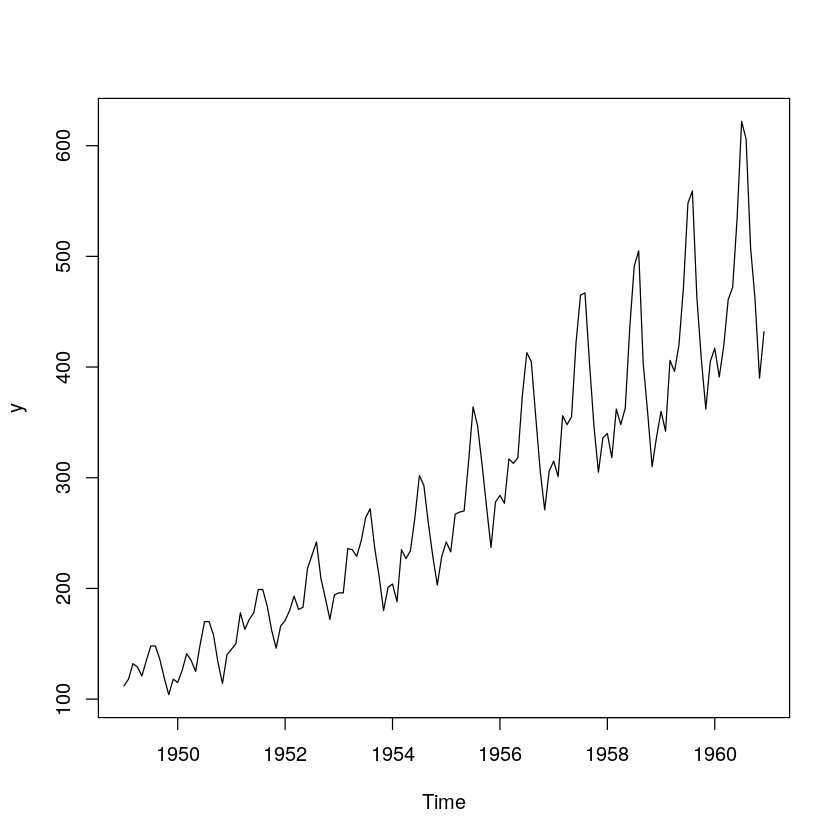

In [4]:
y = AirPassengers
plot(y)

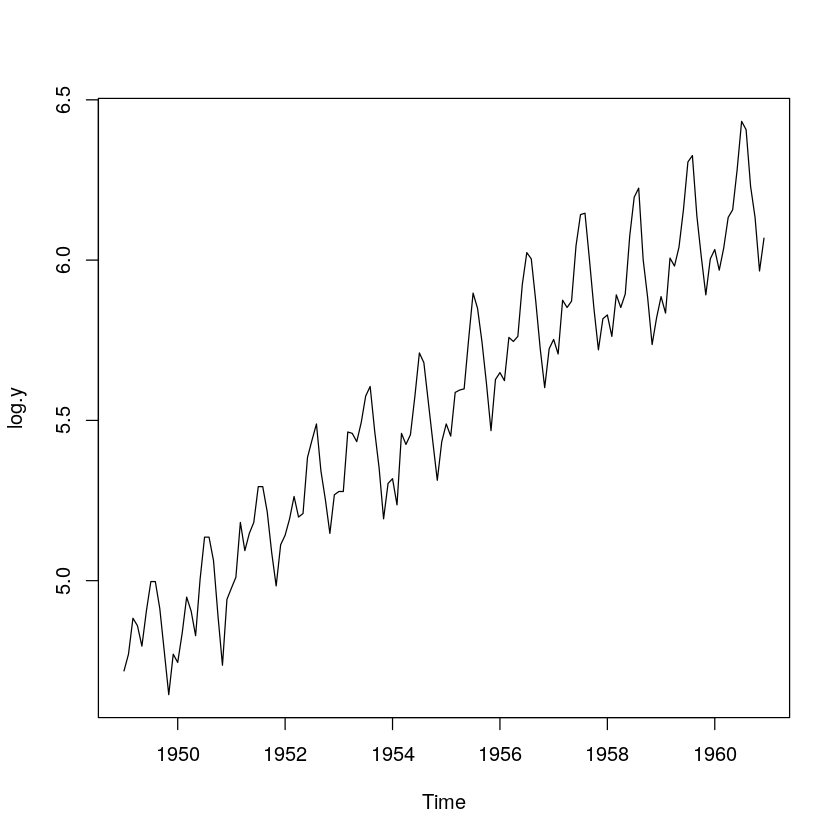

In [5]:
log.y = log(y)
plot(log.y)

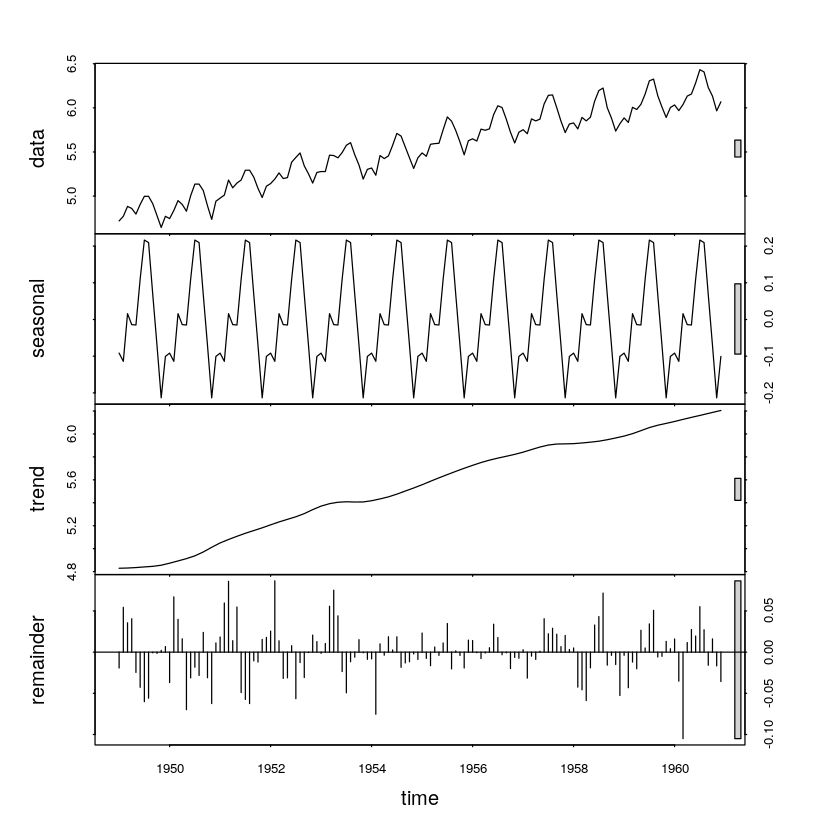

In [13]:
stl.comp = stl(log.y,"per")
plot(stl.comp)

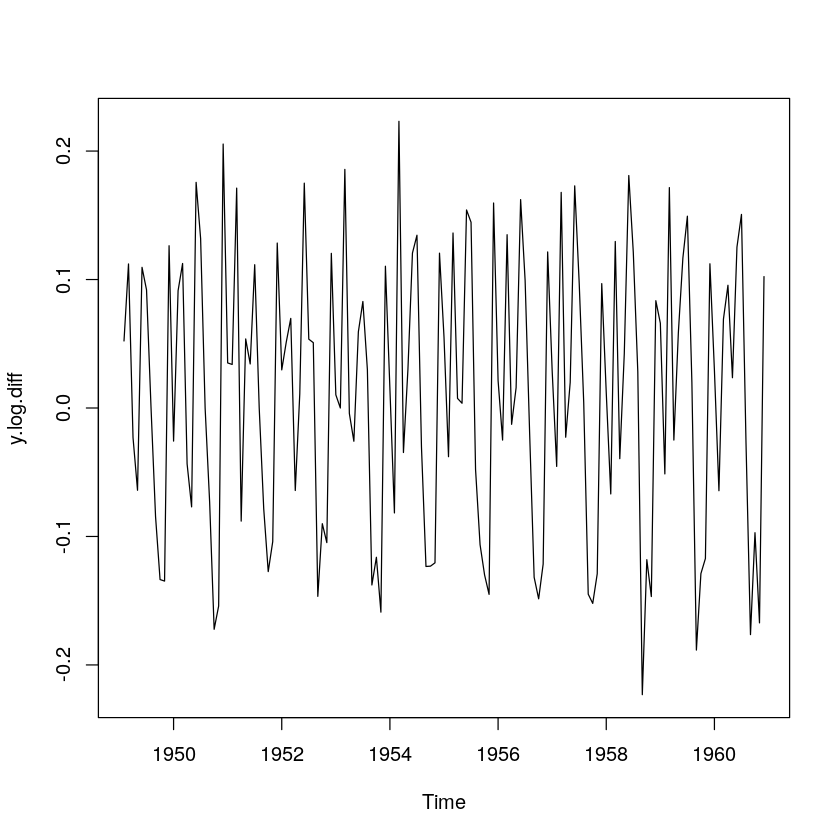

In [17]:
#differencing
y.log.diff = diff(log.y,differences = 1)
plot(y.log.diff)

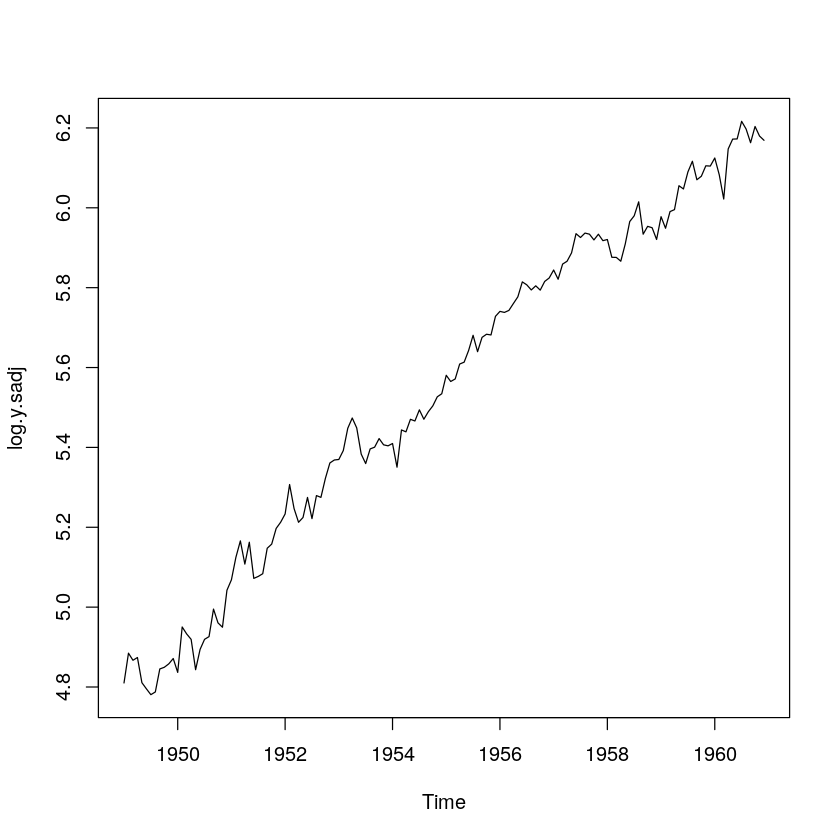

In [32]:
seasonal.comp = stl.comp$time.series[,"seasonal"]
log.y.sadj = log.y-seasonal.comp
plot(log.y.sadj)

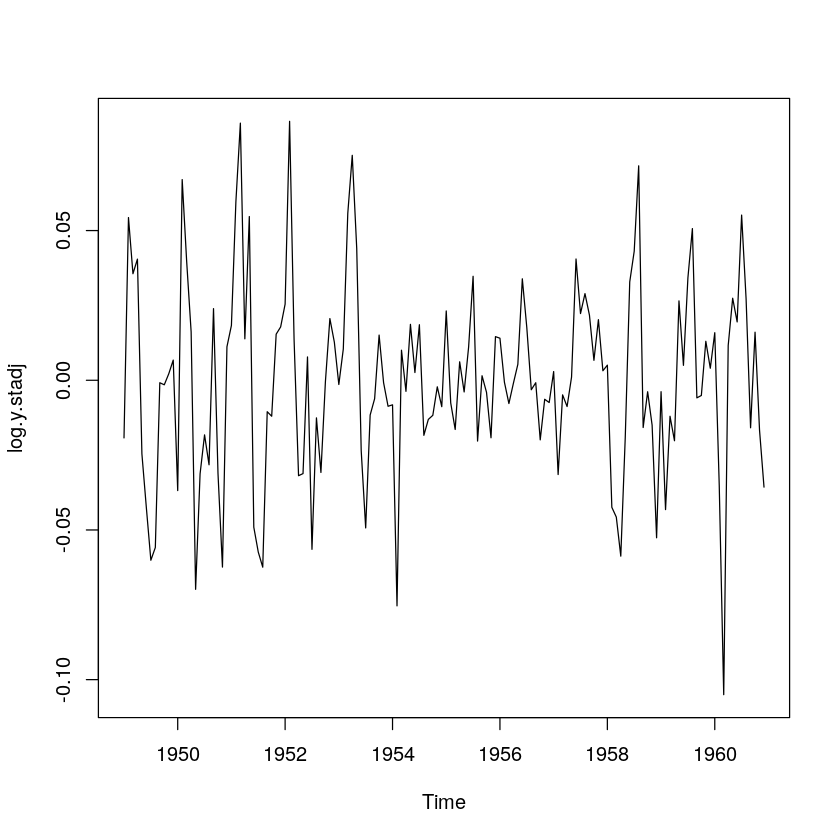

In [34]:
log.y.stadj = log.y.sadj - stl.comp$time.series[,"trend"]
plot(log.y.stadj)

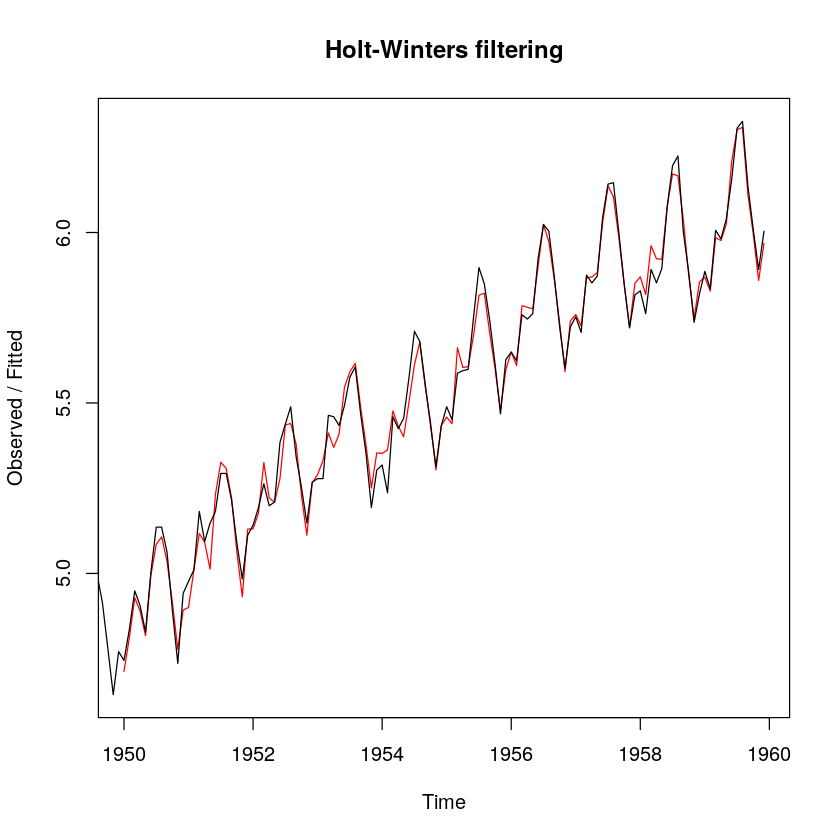

In [40]:
h = 12
N = length(log.y)
n.tr = N-h
train = ts(data = log.y[1:n.tr],start = start(log.y),frequency = frequency(log.y))
test = log.y[(n.tr+1):N]
hw.model = HoltWinters(x = train,seasonal = "additive")
plot(hw.model)

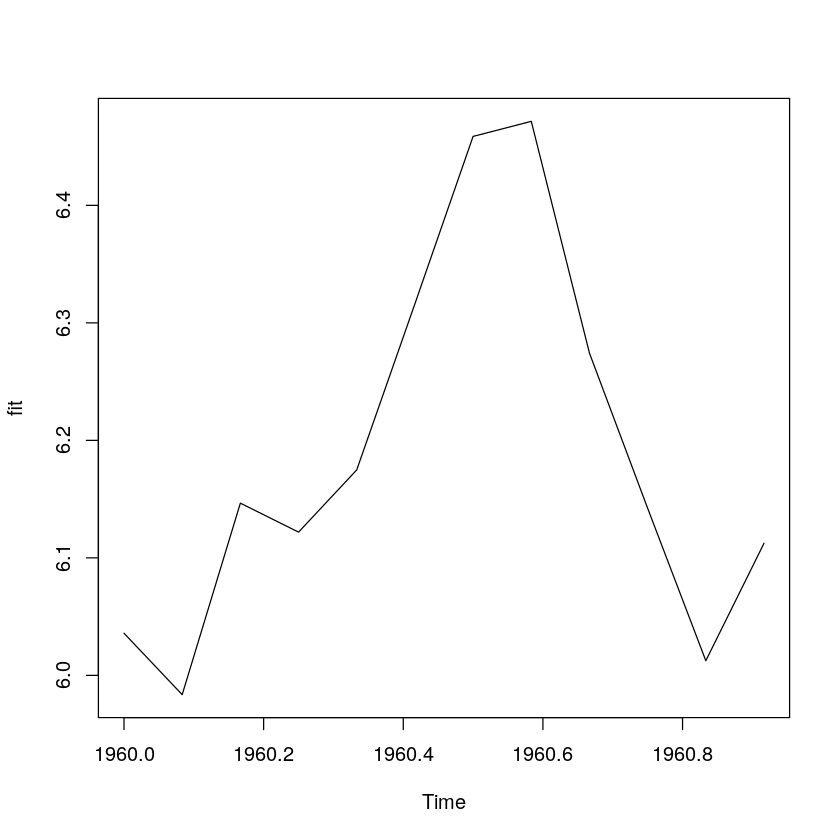

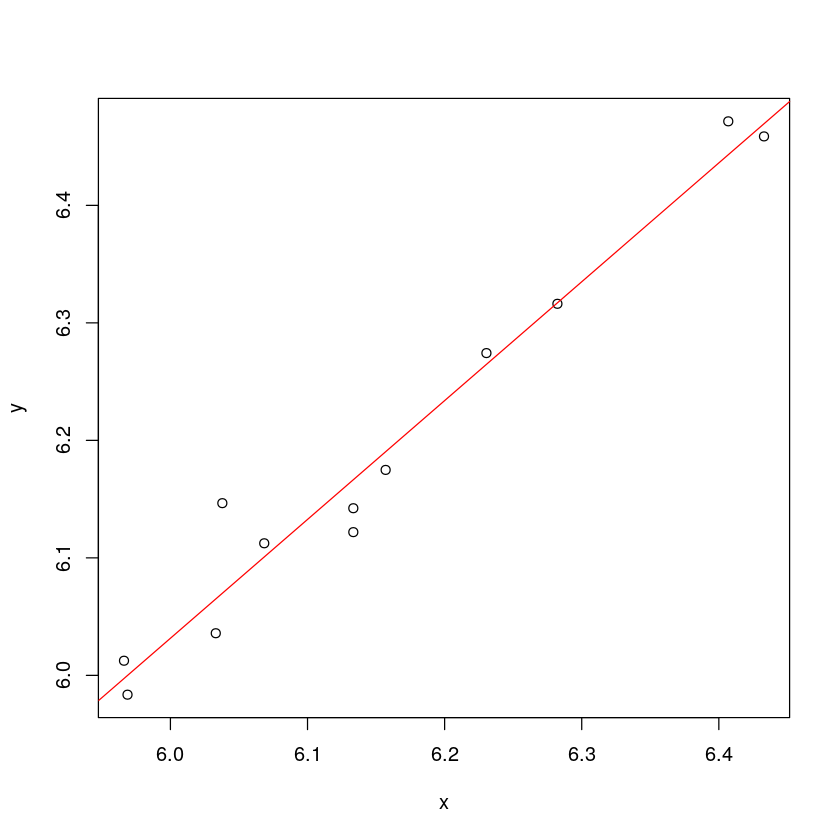

In [63]:
y = as.numeric(predicted)
x = as.numeric(test)
predicted = predict(object = hw.model,n.ahead = h)
plot(predicted)
plot(x = x,y = y)
abline(lm(y~x), col="red") # regression line (y~x) 

In [61]:
#install.packages('hydroGOF')
library(hydroGOF)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [66]:
rmse.hw = rmse(sim = as.numeric(predicted),obs = as.numeric(test))
cat("RMSE hw = ",rmse.hw)

RMSE =  0.04524483

In [69]:
predicted.naive = rep(log.y[n.tr],length(test))
rmse.naive = rmse(sim = predicted.naive,obs = test)
cat("RMSE naive = ",rmse.naive)

RMSE naive =  0.2123574

In [71]:
#benchmark performace against naive forecast
cat(rmse.naive/rmse.hw)

4.693517